# Step 1: Load Dataset

In [1]:
# Import Libraries and modules
import numpy as np 
import pandas as pd
import seaborn as sns
import xlrd
import matplotlib.pyplot as plt
import os

In [2]:
df=pd.read_csv('Advertising.csv')

# Step 2: Exploratory Data Analysis

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# Drop the 'Id' column
df = df.drop(columns =["Unnamed: 0"])
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.shape 

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Step 3: Data Visualization

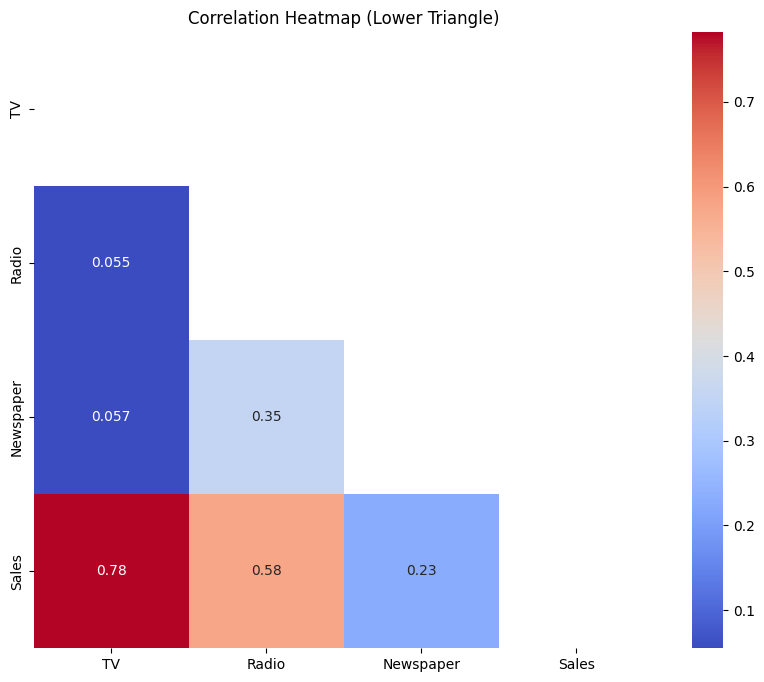

In [8]:
#  select DataFrame 
data = df.select_dtypes(include=['float64'])

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a mask to display only the lower or upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", mask=mask)
plt.title("Correlation Heatmap (Lower Triangle)")
plt.show()

<Axes: >

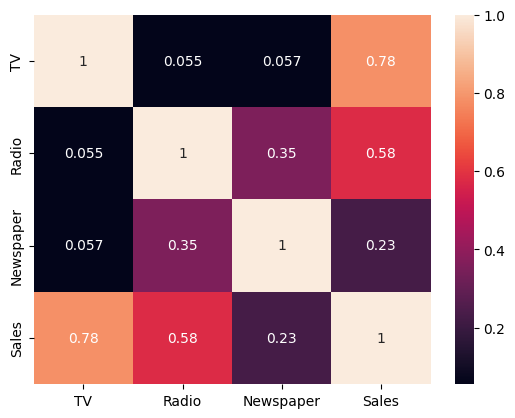

In [10]:
sns.heatmap(df.corr(),annot=True)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


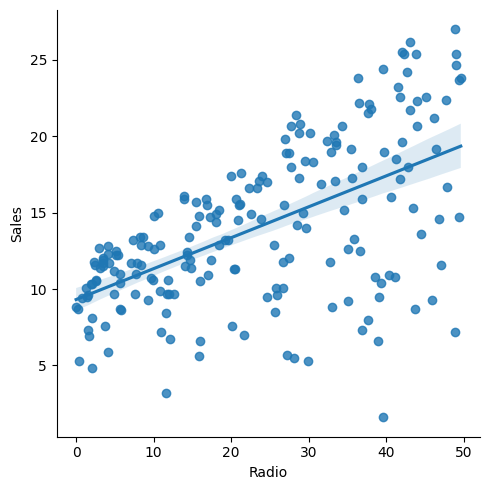

In [11]:
sns.lmplot(data=df,x='Radio',y="Sales")

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


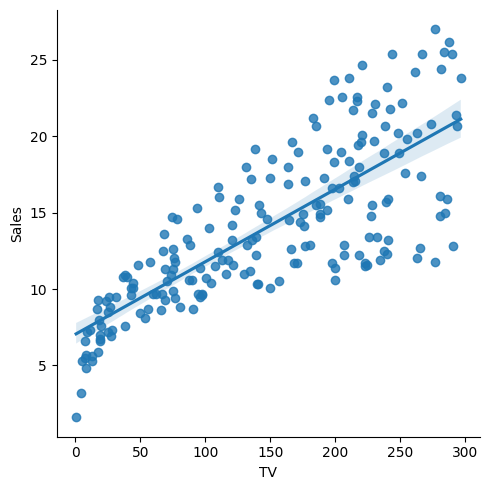

In [12]:
sns.lmplot(data=df,x='TV',y="Sales")

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


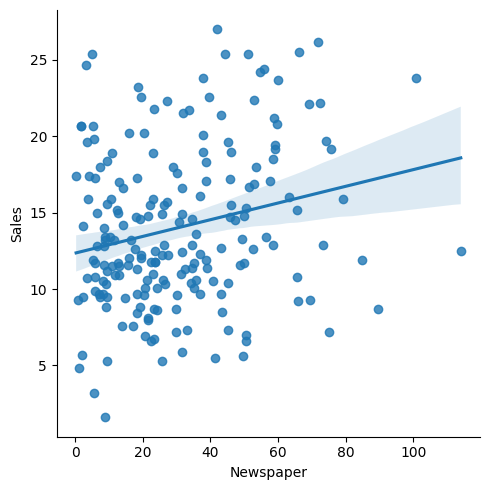

In [13]:
sns.lmplot(data=df,x='Newspaper',y="Sales")

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


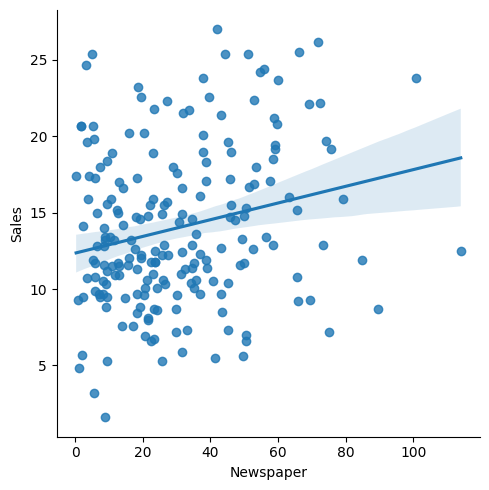

In [14]:
sns.lmplot(data=df,x='Newspaper',y="Sales")

# Step 4: Build Model

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [16]:
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [28]:
# Initialize and train regression models
regression_models = {
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
}

for name, model in regression_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Assess regression performance (e.g., using mean squared error or other regression metrics)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print("\n")

Model: Linear Regression
Mean Squared Error: 3.17


Model: K-Nearest Neighbors
Mean Squared Error: 2.82


Model: Decision Tree
Mean Squared Error: 1.82




In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train regression models
regression_models = {
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
}

for name, model in regression_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate regression metrics
    mean_absolute_err = mean_absolute_error(y_test, y_pred)
    mean_squared_err = mean_squared_error(y_test, y_pred)
    square_root_mean_absolute_err = np.sqrt(mean_absolute_err)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Mean Absolute Error: {mean_absolute_err:.2f}")
    print(f"Mean Squared Error: {mean_squared_err:.2f}")
    print(f"Square Root of Mean Absolute Error: {square_root_mean_absolute_err:.2f}")
    print(f"R-squared (r2) Score: {r2:.2f}")
    
    if name == "Linear Regression":
        # Print coefficients and intercept for Linear Regression
        print(f"Intercept: {model.intercept_:.2f}")
        print("Coefficients:")
        for feature, coef in zip(X_train.columns, model.coef_):
            print(f"{feature}: {coef:.2f}")
    
    print("\n")


Model: Linear Regression
Mean Absolute Error: 1.46
Mean Squared Error: 3.17
Square Root of Mean Absolute Error: 1.21
R-squared (r2) Score: 0.90
Intercept: 2.98
Coefficients:
TV: 0.04
Radio: 0.19
Newspaper: 0.00


Model: K-Nearest Neighbors
Mean Absolute Error: 1.19
Mean Squared Error: 2.82
Square Root of Mean Absolute Error: 1.09
R-squared (r2) Score: 0.91


Model: Decision Tree
Mean Absolute Error: 0.91
Mean Squared Error: 1.52
Square Root of Mean Absolute Error: 0.95
R-squared (r2) Score: 0.95




In [33]:
import pandas as pd

# Initialize and train regression models
regression_models = {
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
}

for name, model in regression_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Create a DataFrame with actual and predicted values
    act_predict = pd.DataFrame({
        'Actual': y_test.values.flatten(),
        'Predict': y_pred.flatten()
    })
    
    # Display the first 20 rows
    print(f"Model: {name}")
    print(act_predict.head())
    print("\n")


Model: Linear Regression
   Actual    Predict
0    16.9  16.408024
1    22.4  20.889882
2    21.4  21.553843
3     7.3  10.608503
4    24.7  22.112373


Model: K-Nearest Neighbors
   Actual  Predict
0    16.9    16.92
1    22.4    20.98
2    21.4    23.42
3     7.3     7.38
4    24.7    19.72


Model: Decision Tree
   Actual  Predict
0    16.9     19.2
1    22.4     20.7
2    21.4     19.6
3     7.3      6.6
4    24.7     23.8




c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


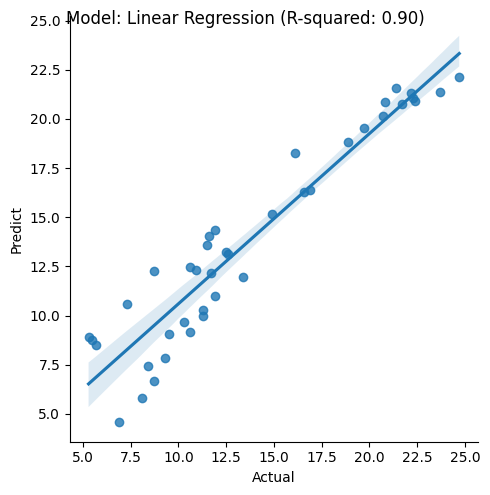

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


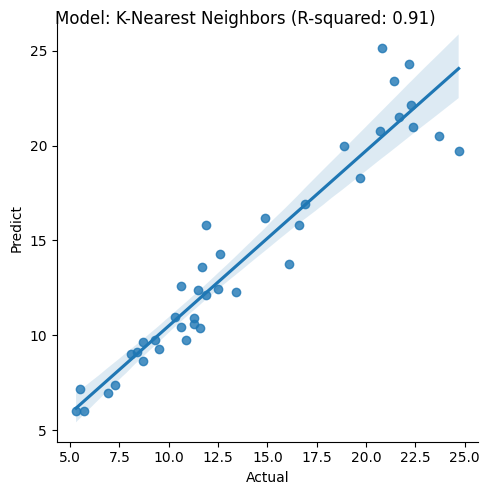

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


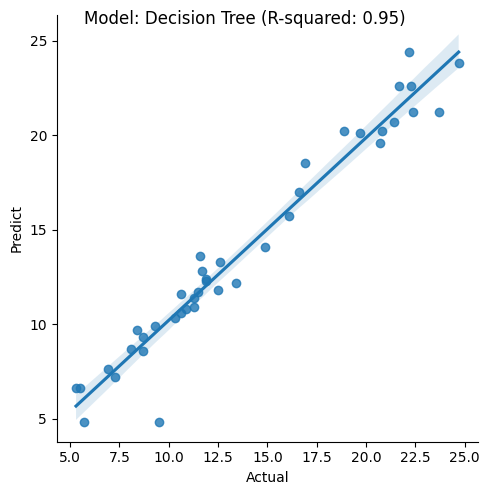

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Initialize and train regression models
regression_models = {
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
}

for name, model in regression_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Create a DataFrame with actual and predicted values
    act_predict = pd.DataFrame({
        'Actual': y_test.values.flatten(),
        'Predict': y_pred.flatten()
    })
    
    # Calculate R-squared (r2) value
    r2 = r2_score(act_predict['Actual'], act_predict['Predict'])
    
    # Create an lmplot and annotate with r2 value
    g = sns.lmplot(data=act_predict, x='Actual', y='Predict')
    g.fig.suptitle(f"Model: {name} (R-squared: {r2:.2f})", fontsize=12)
    plt.show()
    print("\n")
